In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/layoffs_data.csv')

In [5]:
df.head(5)

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised (Millions),Stage,Date_Added,Country,List_of_Employees_Laid_Off,Sum of Employees,Average # of Employees Laid Off,Average Layoff %,Total Funds Raised,Average Funds Raised,Unnamed: 17,Unnamed: 18
0,Splunk,SF Bay Area,Data,325,4%,2/1/2023,https://www.marketwatch.com/story/splunk-to-la...,2400.0,IPO,2/1/2023 17:01,United States,Unknown,290317.0,262.018953,23%,850192.86,835.98,NaN,NaN
1,DraftKings,Boston,Consumer,140,4%,2/1/2023,https://www.cnbc.com/2023/02/01/draftkings-cut...,719.0,IPO,2/1/2023 19:08,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wheel,Austin,Healthcare,56,28%,2/1/2023,https://www.beckershospitalreview.com/teleheal...,215.0,Series C,2/2/2023 0:04,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chainalysis,New York City,Crypto,44,5%,2/1/2023,https://www.forbes.com/sites/stevenehrlich/202...,536.0,Series F,2/2/2023 3:13,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Exterro,Portland,Legal,24,3%,2/1/2023,https://www.oregonlive.com/silicon-forest/2023...,100.0,Private Equity,2/2/2023 0:05,United States,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(1108, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company                          1108 non-null   object 
 1   Location_HQ                      1108 non-null   object 
 2   Industry                         1108 non-null   object 
 3   Laid_Off_Count                   1108 non-null   int64  
 4   Percentage                       1108 non-null   object 
 5   Date                             1108 non-null   object 
 6   Source                           1108 non-null   object 
 7   Funds_Raised (Millions)          1017 non-null   float64
 8   Stage                            1108 non-null   object 
 9   Date_Added                       1108 non-null   object 
 10  Country                          1108 non-null   object 
 11  List_of_Employees_Laid_Off       1108 non-null   object 
 12  Sum of Employees    

In [8]:
pd.isna(df).sum()

Company                               0
Location_HQ                           0
Industry                              0
Laid_Off_Count                        0
Percentage                            0
Date                                  0
Source                                0
Funds_Raised (Millions)              91
Stage                                 0
Date_Added                            0
Country                               0
List_of_Employees_Laid_Off            0
Sum of Employees                   1107
Average # of Employees Laid Off    1107
Average Layoff %                   1107
Total Funds Raised                 1107
Average Funds Raised               1107
Unnamed: 17                        1108
Unnamed: 18                        1108
dtype: int64

In [9]:
df.drop(['Unnamed: 17'], axis=1,inplace=True)

In [10]:
df.drop(['Sum of Employees'],axis=1,inplace=True)

In [11]:
df.drop(['Average # of Employees Laid Off'],axis=1,inplace=True)

In [12]:
df.drop(['Average Layoff %'],axis=1,inplace=True)

In [13]:
df.drop(['Total Funds Raised'],axis=1,inplace=True)

In [14]:
df.drop(['Average Funds Raised'],axis=1,inplace=True)

In [15]:
df.drop(['List_of_Employees_Laid_Off'],axis=1,inplace=True)

In [16]:
df.drop(['Unnamed: 18'],axis=1,inplace=True)

In [17]:
pd.isna(df).sum()

Company                     0
Location_HQ                 0
Industry                    0
Laid_Off_Count              0
Percentage                  0
Date                        0
Source                      0
Funds_Raised (Millions)    91
Stage                       0
Date_Added                  0
Country                     0
dtype: int64

**There is 91 null values in Fund raised column we cant drop it becaues it may store the important details of layoff done in companys which Data my be need.**

<Axes: xlabel='Funds_Raised (Millions)'>

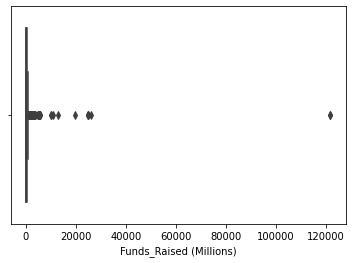

In [18]:
sns.boxplot(data=df,x='Funds_Raised (Millions)')

In [19]:
df['Funds_Raised (Millions)'].quantile(0.1)

18.60000000000001

In [20]:
df.shape

(1108, 11)

In [21]:
df['Funds_Raised (Millions)'].quantile(0.9)

1139.9999999999977

In [22]:
total_layoff_count_by_role = df.groupby('Industry')['Laid_Off_Count'].sum()
type(total_layoff_count_by_role)

pandas.core.series.Series

In [23]:
x=total_layoff_count_by_role.sort_values(ascending=False)

In [24]:
a=x.head(15)

In [25]:
a=a.to_frame(name="count")
type(a)

pandas.core.frame.DataFrame

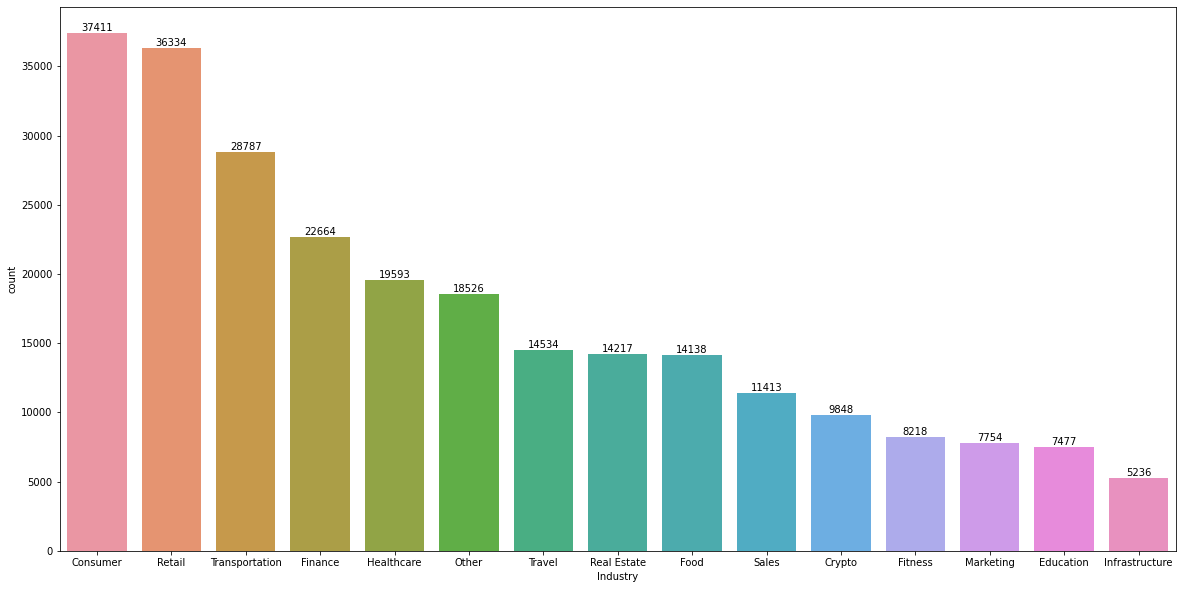

In [26]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x=a.index,y=a['count'])
for i in ax.containers:
  ax.bar_label(i,)

***Customer care based roles employees are mostly last their job follwed by  Retail industry***

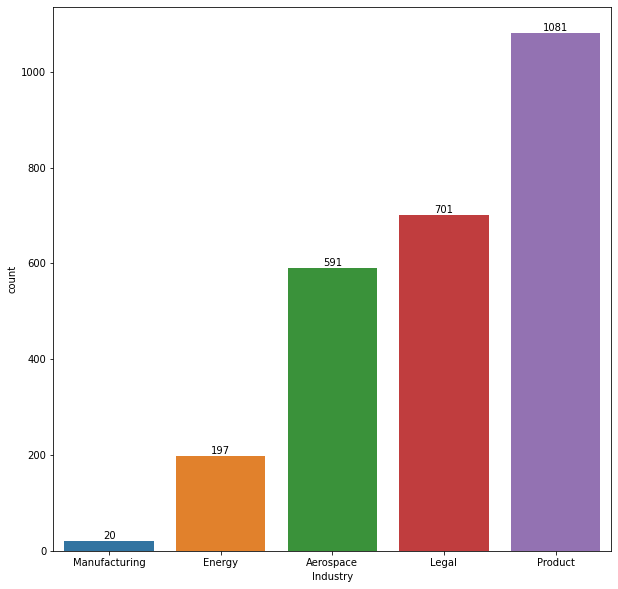

In [61]:
x=total_layoff_count_by_role.sort_values(ascending=True)
a=x.head(5)
a=a.to_frame(name="count")
plt.subplots(figsize=(10,10))
ax=sns.barplot(x=a.index,y=a['count'])
for i in ax.containers:
  ax.bar_label(i,)

In [28]:
df['Company'].nunique()

964

In [29]:
com=df.groupby('Company')['Laid_Off_Count'].sum()

In [30]:
com=com.sort_values(ascending=False)
com=com.to_frame(name="count")
com=com.head(15)

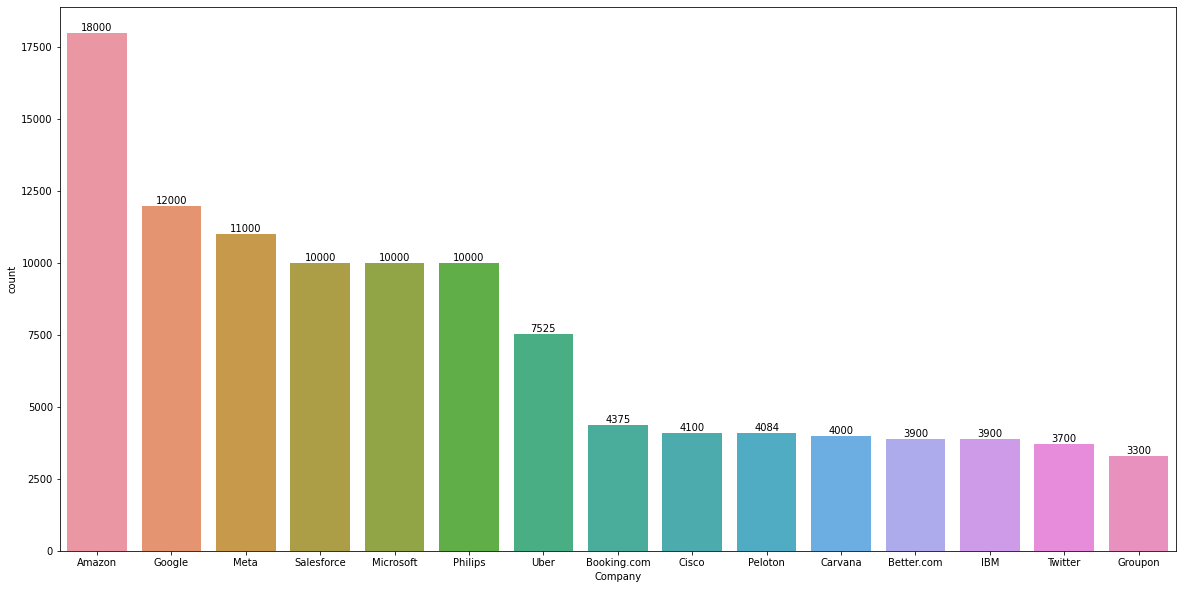

In [31]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x=com.index,y=com['count'])
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

***Amazon has layoffed the most employees in last few years***

In [32]:
location=df.groupby('Country')['Laid_Off_Count'].sum()
location=location.sort_values(ascending=False)

In [33]:
location=location.to_frame(name="count")
location=location.head(15)

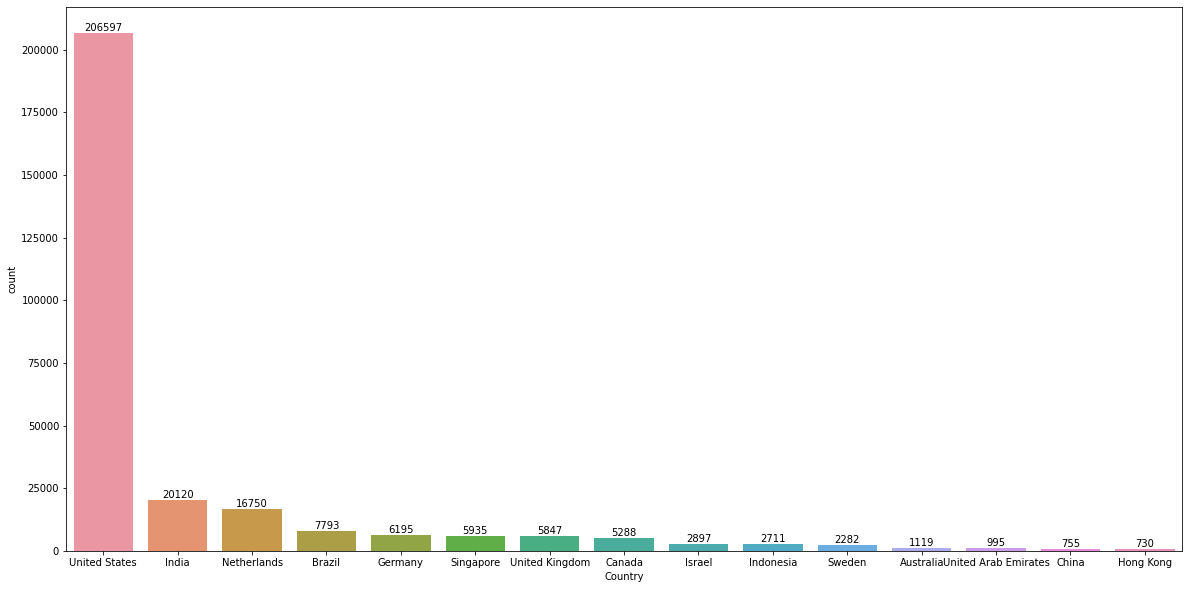

In [34]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x=location.index,y=location['count'])
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

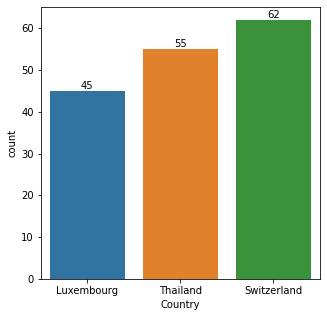

In [35]:
location=df.groupby('Country')['Laid_Off_Count'].sum()
location=location.sort_values(ascending=True)
location=location.to_frame(name="count")
location=location.head(3)
plt.subplots(figsize=(5,5))
ax=sns.barplot(x=location.index,y=location['count'])
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

**United states of America and India has most layoff because they both have the most IT company located
 and least layoff was done in Luxembourg**

In [36]:
df['Date']=pd.to_datetime(df['Date'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Company                  1108 non-null   object        
 1   Location_HQ              1108 non-null   object        
 2   Industry                 1108 non-null   object        
 3   Laid_Off_Count           1108 non-null   int64         
 4   Percentage               1108 non-null   object        
 5   Date                     1108 non-null   datetime64[ns]
 6   Source                   1108 non-null   object        
 7   Funds_Raised (Millions)  1017 non-null   float64       
 8   Stage                    1108 non-null   object        
 9   Date_Added               1108 non-null   object        
 10  Country                  1108 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 95.3+ KB


In [38]:
df['year'] = df['Date'].dt.year

In [39]:
df.head(3)

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised (Millions),Stage,Date_Added,Country,year
0,Splunk,SF Bay Area,Data,325,4%,2023-02-01,https://www.marketwatch.com/story/splunk-to-la...,2400.0,IPO,2/1/2023 17:01,United States,2023
1,DraftKings,Boston,Consumer,140,4%,2023-02-01,https://www.cnbc.com/2023/02/01/draftkings-cut...,719.0,IPO,2/1/2023 19:08,United States,2023
2,Wheel,Austin,Healthcare,56,28%,2023-02-01,https://www.beckershospitalreview.com/teleheal...,215.0,Series C,2/2/2023 0:04,United States,2023


In [40]:
year=df.groupby('year')['Laid_Off_Count'].sum()
year.sort_values(ascending=False,inplace=True)
year=year.to_frame(name="count")

In [41]:
year

,count
year,
2022,134990
2023,78203
2020,70621
2021,6503


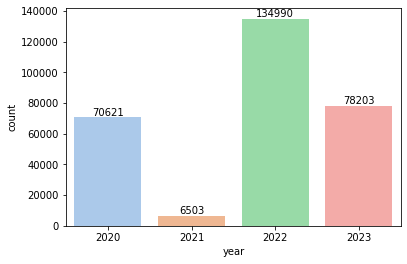

In [42]:
ax=sns.barplot(x=year.index,y=year['count'],palette="pastel")
for i in ax.containers:
  ax.bar_label(i,)

([<matplotlib.patches.Wedge at 0x7ff72c9f7f40>,
 [Text(0.12079535608701325, 1.0933473747843419, '2022'),
  Text(-0.8912978079060067, -0.6446613200913698, '2023'),
  Text(0.6794985396783776, -0.865032793930353, '2020'),
  Text(1.097277507789895, -0.07734384848452508, '2021')],
 [Text(0.06588837604746177, 0.5963712953369137, '46%'),
  Text(-0.48616244067600356, -0.3516334473225653, '27%'),
  Text(0.37063556709729684, -0.4718360694165561, '24%'),
  Text(0.5985150042490336, -0.04218755371883186, '2%')])

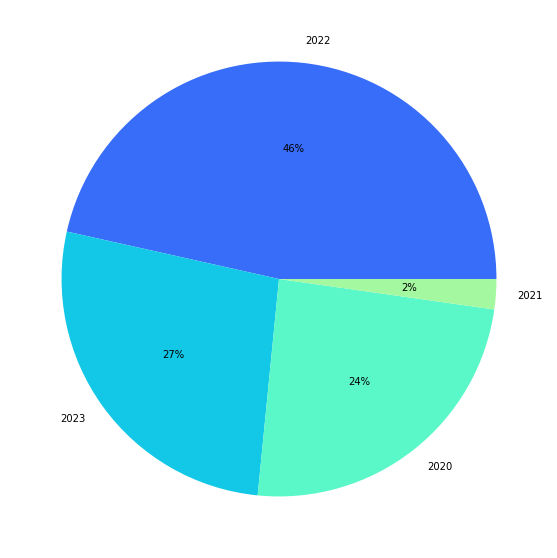

In [43]:
plt.subplots(figsize=(10,10))
palette_color = sns.color_palette('rainbow')
plt.pie(year['count'],labels=year.index,colors=palette_color, autopct='%.0f%%')


**year 2022(46%)has most layoff although year 2023(27%) has less count this dataset has values upto feb only**

In [44]:
df.head(1)

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised (Millions),Stage,Date_Added,Country,year
0,Splunk,SF Bay Area,Data,325,4%,2023-02-01,https://www.marketwatch.com/story/splunk-to-la...,2400.0,IPO,2/1/2023 17:01,United States,2023


In [45]:
df['Stage'].unique()

array(['IPO', 'Series C', 'Series F', 'Private Equity', 'Unknown',
       'Acquired', 'Series H', 'Series A', 'Series E', 'Series B',
       'Series D', 'Subsidiary', 'Seed', 'Series I', 'Series J',
       'Series G'], dtype=object)

In [46]:
stage=df.groupby('Stage')['Laid_Off_Count'].sum()
stage=stage.to_frame(name="count")
stage

,count
Stage,
Acquired,16954
IPO,165353
Private Equity,6410
Seed,1284
Series A,3975
Series B,11774
Series C,12568
Series D,15837
Series E,9574


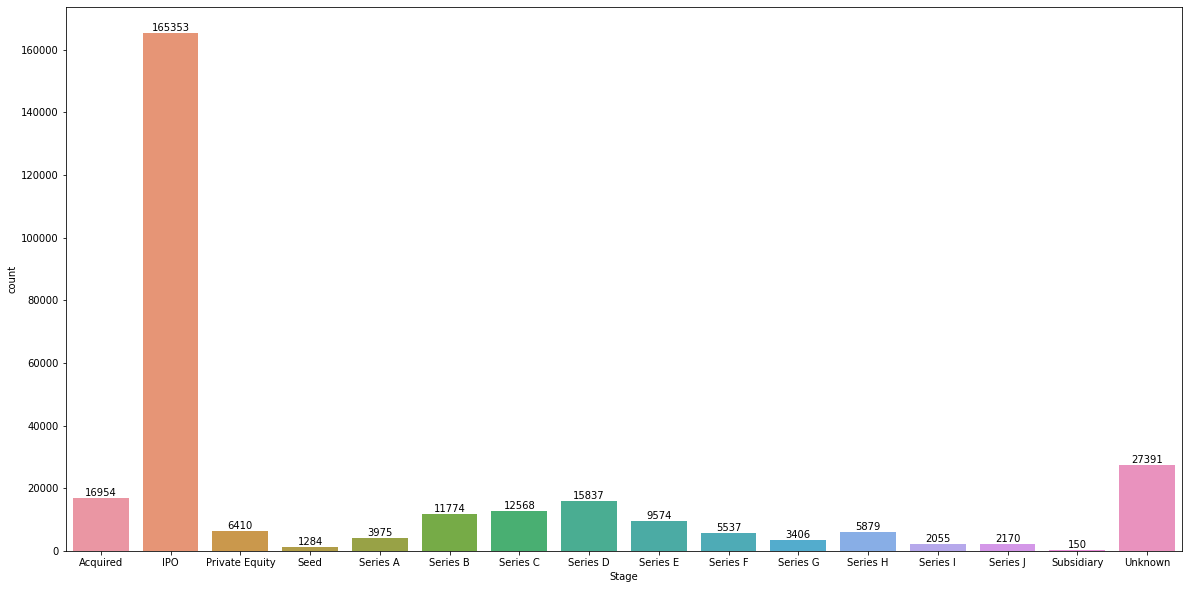

In [47]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x=stage.index,y=stage['count'])
for i in ax.containers:
  ax.bar_label(i,)

**The company which is in IPO(initial public offering)stage means can sell stocks laid off most employee which is clear that IPO stage companys has more employess complared to other stage companys which is the reason for the huge count. **

In [48]:
per=df.sort_values(by='Percentage',ascending=False)

In [49]:
per['Percentage'] = pd.to_numeric(per['Percentage'].str.strip('%')) / 100

In [50]:
pre=per.head(15)

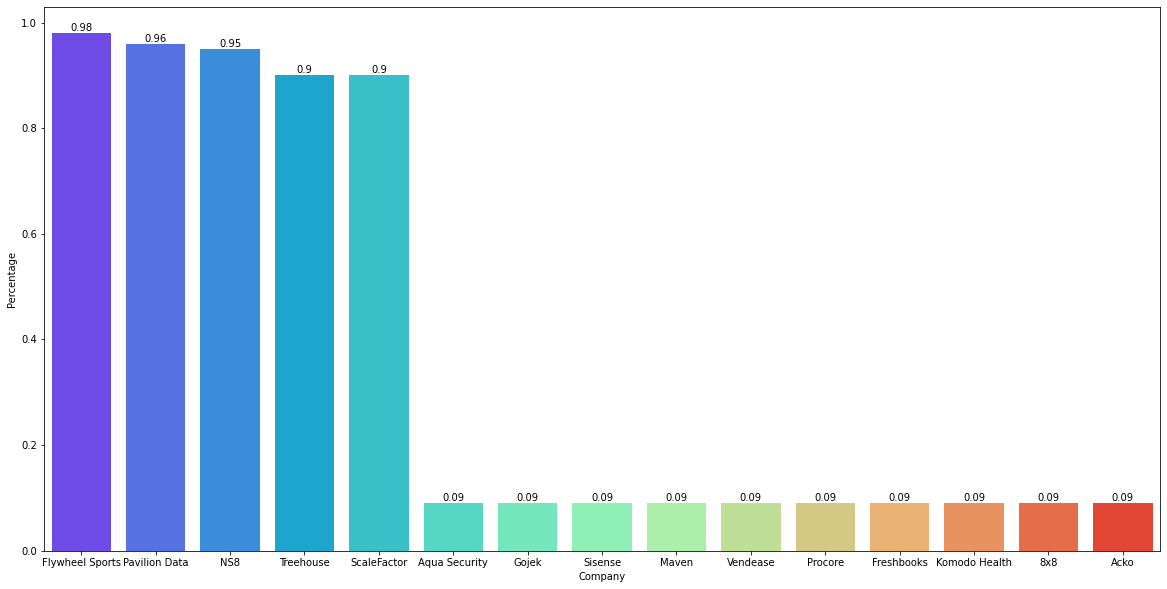

In [51]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(data=pre,x='Company',y='Percentage',palette="rainbow")
for i in ax.containers:
  ax.bar_label(i,)

***Flywheel Sports is laid off around 98 percentage of their exployees count.***

In [53]:
df.to_csv('final.csv', index=False)

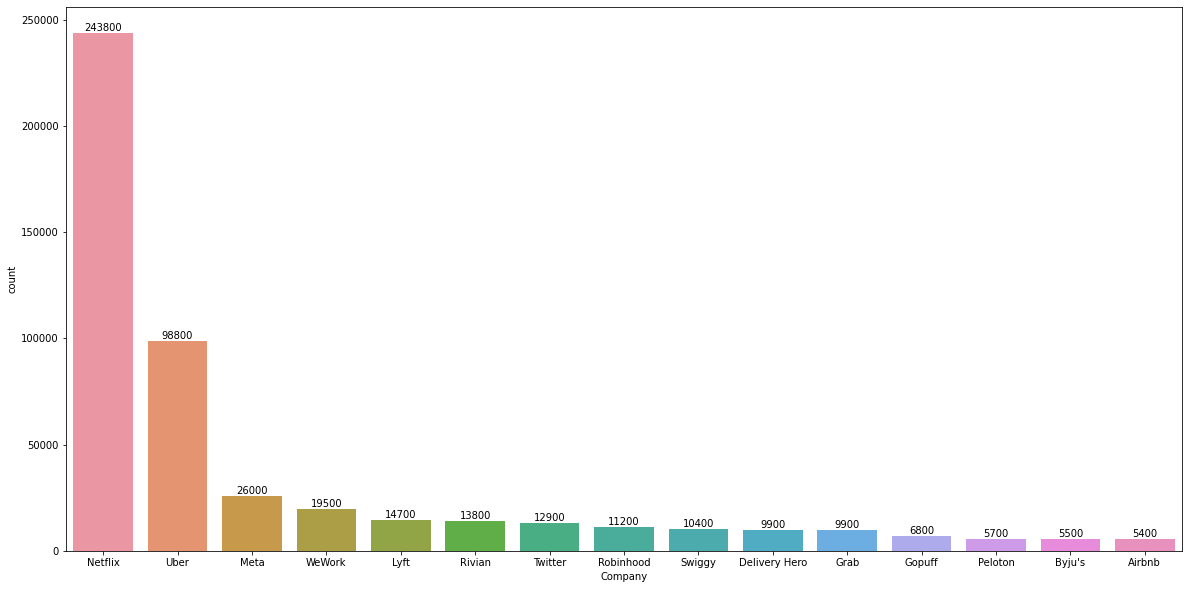

In [56]:
com=df.groupby('Company')['Funds_Raised (Millions)'].sum()
com=com.sort_values(ascending=False)
com=com.to_frame(name="count")
com=com.head(15)
plt.subplots(figsize=(20,10))
ax=sns.barplot(x=com.index,y=com['count'])
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

In [57]:
xx=df.sort_values(by='Funds_Raised (Millions)',ascending=False)

In [58]:
xx.head(5)

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised (Millions),Stage,Date_Added,Country,year
570,Netflix,SF Bay Area,Media,300,3%,2022-06-23,https://www.cnbc.com/2022/06/23/netflix-lays-o...,121900.0,IPO,6/23/2022 19:35,United States,2022
683,Netflix,SF Bay Area,Media,150,1%,2022-05-17,https://www.cnbc.com/2022/05/17/netflix-lays-o...,121900.0,IPO,5/17/2022 18:58,United States,2022
261,Meta,SF Bay Area,Consumer,11000,13%,2022-11-09,https://www.cnbc.com/2022/11/09/meta-to-lay-of...,26000.0,IPO,11/9/2022 15:04,United States,2022
829,Uber,SF Bay Area,Transportation,3000,13%,2020-05-18,https://layoffs.fyi/2020/05/18/uber-lays-off-3...,24700.0,IPO,5/18/2020 15:28,United States,2020
789,Uber,Amsterdam,Transportation,225,25%,2020-06-12,https://www.dutchnews.nl/news/2020/06/uber-cut...,24700.0,IPO,6/27/2020 18:25,Netherlands,2020


***Netflix has raised more fund by layoff***